In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_PATH = "/content/drive/MyDrive/Hypertension_Final_Project/cleaned_file/"

#master_file 45000 rows, 295 cols, original dataset  
  ===> 35000 rows 218 cols 

In [ ]:
master_file = pd.read_csv(BASE_PATH + 'Hyper_master_file_v3.csv', index_col=0)

In [ ]:
master_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44584 entries, 0 to 44583
Columns: 295 entries, SEQN to Hyper
dtypes: float64(291), object(4)
memory usage: 100.7+ MB


In [ ]:
# for i in master_file.columns:
#   if 'Told_High_blood_pressure' in i:
#     print (i)

Told_High_blood_pressure_dummy


In [ ]:
# master_file[master_file['Systolic_BP'].isnull()]

# del ['na_count'] < 90 && num > 10000

In [ ]:
master_file['na_count'] = master_file.isnull().sum(axis=1)

In [ ]:
master_file = master_file[master_file['na_count'] < 90]

In [ ]:
master_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35045 entries, 0 to 44583
Columns: 296 entries, SEQN to na_count
dtypes: float64(291), int64(1), object(4)
memory usage: 79.4+ MB


In [ ]:
col_list=list(master_file)
out_list=[]
for col_name in col_list:
  num = master_file[col_name].isnull().sum(axis=0)
  if num > 10000:
    out_list.append(col_name)
out_list

['alcohol_drink_frequency_dummy',
 'alcohol_drink_per_day',
 'DBD100_x',
 'DRD350A',
 'DRD350AQ',
 'DRD350B',
 'DRD350BQ',
 'DRD350C',
 'DRD350CQ',
 'DRD350D',
 'DRD350DQ',
 'DRD350E',
 'DRD350EQ',
 'DRD350F',
 'DRD350FQ',
 'DRD350G',
 'DRD350GQ',
 'DRD350H',
 'DRD350HQ',
 'DRD350I',
 'DRD350IQ',
 'DRD350J',
 'DRD350JQ',
 'DRD350K',
 'DRD370A',
 'DRD370AQ',
 'DRD370B',
 'DRD370BQ',
 'DRD370C',
 'DRD370CQ',
 'DRD370D',
 'DRD370DQ',
 'DRD370E',
 'DRD370EQ',
 'DRD370F',
 'DRD370FQ',
 'DRD370G',
 'DRD370GQ',
 'DRD370H',
 'DRD370HQ',
 'DRD370I',
 'DRD370IQ',
 'DRD370J',
 'DRD370K',
 'DRD370L',
 'DRD370M',
 'DRD370MQ',
 'DRD370N',
 'DRD370O',
 'DRD370P',
 'DRD370Q',
 'DRD370R',
 'DRD370S',
 'DRD370T',
 'DRD370TQ',
 'DRD370U',
 'DR2MNRSP',
 'DR2HELPD',
 'DR1DRSTZ_y',
 'DR1LANG_y',
 'DBQ095Z_y',
 'DBD100_y',
 'DRQSPREP_y',
 'DR1TWS_y',
 'DRD340_y',
 'DRQSDT11',
 'DRQSDT12',
 'DR1STY',
 'DR1SKY',
 'DR2STY',
 'DR2SKY',
 'DR1MRESP',
 'DR1HELP',
 'DR2MRESP',
 'DR2HELP',
 'DMDHREDZ',
 'DR1TWSZ',
 '

In [ ]:
master_file=master_file.drop(columns=out_list)


In [ ]:
master_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35045 entries, 0 to 44583
Columns: 218 entries, SEQN to na_count
dtypes: float64(213), int64(1), object(4)
memory usage: 58.6+ MB


In [ ]:
master_file.loc[(master_file['trouble_sleeping_dummy']=='low'),'trouble_sleeping_dummy']=0
master_file.loc[(master_file['trouble_sleeping_dummy']=='mild'),'trouble_sleeping_dummy']=1
master_file.loc[(master_file['trouble_sleeping_dummy']=='severe'),'trouble_sleeping_dummy']=2

In [ ]:
master_file.loc[(master_file['feeling_tired_dummy']=='low'),'feeling_tired_dummy']=0
master_file.loc[(master_file['feeling_tired_dummy']=='mild'),'feeling_tired_dummy']=1
master_file.loc[(master_file['feeling_tired_dummy']=='severe'),'feeling_tired_dummy']=2

In [ ]:
master_file.loc[(master_file['poor_appetite_dummy']=='low'),'poor_appetite_dummy']=0
master_file.loc[(master_file['poor_appetite_dummy']=='mild'),'poor_appetite_dummy']=1
master_file.loc[(master_file['poor_appetite_dummy']=='severe'),'poor_appetite_dummy']=2

In [ ]:
master_file.loc[(master_file['feeling_bad_dummy']=='low'),'feeling_bad_dummy']=0
master_file.loc[(master_file['feeling_bad_dummy']=='mild'),'feeling_bad_dummy']=1
master_file.loc[(master_file['feeling_bad_dummy']=='severe'),'feeling_bad_dummy']=2

# split train,valid, test

In [ ]:
X= master_file.loc[:, master_file.columns != 'Hyper']
X= X.loc[:, X.columns != 'Systolic_BP']
X= X.loc[:, X.columns != 'Diastolic_BP']
X= X.loc[:, X.columns != 'Taking_Medicine_for_HBP_dummy']
X= X.loc[:, X.columns != 'SDDSRVYR']
X= X.loc[:, X.columns != 'na_count']
y= master_file.loc[:, 'Hyper']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=123, stratify = y_train)

In [ ]:
df_fillna=X_train
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21027 entries, 21932 to 12870
Columns: 212 entries, SEQN to DR2TWS
dtypes: float64(208), object(4)
memory usage: 34.2+ MB


In [ ]:
missing_df=df_fillna.isna().sum()

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
pure_miss = missing_df.to_frame()
pure_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, SEQN to DR2TWS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       212 non-null    int64
dtypes: int64(1)
memory usage: 3.3+ KB


In [ ]:
pure_miss[pure_miss.iloc[:,0]!=0]


,0
Household_reference_education_dummy,3651
Marital_Status_dummy,5222
Education_dummy,465
Income_dummy,945
Poverty_dummy,1753
Country_of_birth_dummy,3
Weight(kg),164
Height(cm),160
BMI,187
Arm_Circumference,427


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
df_fillna.head()

,SEQN,Told_High_blood_pressure_dummy,Hypertension_dummy,gender_dummy,age,race_dummy,Household_reference_education_dummy,Marital_Status_dummy,Education_dummy,Income_dummy,...,DR2TP184,DR2TP204,DR2TP205,DR2TP225,DR2TP226,DR2_300,DR2_320Z,DR2_330Z,DR2BWATZ,DR2TWS
21932,67038.0,0.0,0.0,1.0,11.0,3.0,3.0,NaN,1.0,6.0,...,5.397605e-79,0.056,2.000000e-03,0.006,0.006,2.0,474.00,5.397605e-79,4.740000e+02,1.0
24916,77414.0,0.0,0.0,1.0,32.0,1.0,2.0,1.0,2.0,6.0,...,5.397605e-79,0.293,2.000000e-03,0.019,0.078,2.0,1521.00,5.397605e-79,1.521000e+03,2.0
20966,71526.0,0.0,0.0,2.0,39.0,5.0,5.0,1.0,5.0,12.0,...,7.000000e-03,0.088,1.400000e-02,0.020,0.005,3.0,2073.75,2.073750e+03,5.397605e-79,1.0
35444,92363.0,0.0,0.0,2.0,27.0,4.0,3.0,3.0,3.0,1.0,...,5.397605e-79,0.072,5.397605e-79,0.002,0.007,2.0,507.00,5.397605e-79,5.070000e+02,1.0
20978,71542.0,1.0,0.0,2.0,67.0,3.0,5.0,1.0,5.0,12.0,...,5.397605e-79,0.203,5.397605e-79,0.009,0.045,2.0,429.56,4.295600e+02,5.397605e-79,2.0


In [ ]:
df_fillna=df_fillna.drop(columns={'SEQN'})

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df_fillna), columns = df_fillna.columns)
df.head()

,Told_High_blood_pressure_dummy,Hypertension_dummy,gender_dummy,age,race_dummy,Household_reference_education_dummy,Marital_Status_dummy,Education_dummy,Income_dummy,Poverty_dummy,...,DR2TP184,DR2TP204,DR2TP205,DR2TP225,DR2TP226,DR2_300,DR2_320Z,DR2_330Z,DR2BWATZ,DR2TWS
0,0.0,0.0,0.0,0.041667,0.50,0.250,NaN,0.00,0.454545,0.0,...,0.000000,0.017610,0.000469,0.002377,0.000865,0.125,0.041146,0.000000,0.041885,0.000000
1,0.0,0.0,0.0,0.333333,0.00,0.125,0.0,0.25,0.454545,0.0,...,0.000000,0.092138,0.000469,0.007528,0.011249,0.125,0.132031,0.000000,0.134403,0.010204
2,0.0,0.0,1.0,0.430556,1.00,0.500,0.0,1.00,1.000000,0.0,...,0.005564,0.027673,0.003284,0.007924,0.000721,0.250,0.180013,0.180013,0.000000,0.000000
3,0.0,0.0,1.0,0.263889,0.75,0.250,1.0,0.50,0.000000,1.0,...,0.000000,0.022642,0.000000,0.000792,0.001010,0.125,0.044010,0.000000,0.044801,0.000000
4,1.0,0.0,1.0,0.819444,0.50,0.500,0.0,1.00,1.000000,0.0,...,0.000000,0.063836,0.000000,0.003566,0.006490,0.125,0.037288,0.037288,0.000000,0.010204


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
X_test=X_test.drop(columns={'SEQN'})
X_valid=X_valid.drop(columns={'SEQN'})

In [ ]:
test_S = scaler.transform(X_test)
valid_S = scaler.transform(X_valid)


In [ ]:
df1 = scaler.inverse_transform(df)
df_test_x=scaler.inverse_transform(test_S)
df_valid_x=scaler.inverse_transform(valid_S)

In [ ]:
df1=pd.DataFrame(df1,columns = df_fillna.columns)
df_test_x=pd.DataFrame(df_test_x,columns = df_fillna.columns)
df_valid_x=pd.DataFrame(df_valid_x,columns = df_fillna.columns)

In [ ]:
df1.head()

,Told_High_blood_pressure_dummy,Hypertension_dummy,gender_dummy,age,race_dummy,Household_reference_education_dummy,Marital_Status_dummy,Education_dummy,Income_dummy,Poverty_dummy,...,DR2TP184,DR2TP204,DR2TP205,DR2TP225,DR2TP226,DR2_300,DR2_320Z,DR2_330Z,DR2BWATZ,DR2TWS
0,0.0,0.0,1.0,11.0,3.0,3.0,2.0,1.0,6.0,0.0,...,5.397605e-79,0.056,2.000000e-03,0.006,0.006,2.0,474.00,5.397605e-79,4.740000e+02,1.0
1,0.0,0.0,1.0,32.0,1.0,2.0,1.0,2.0,6.0,0.0,...,5.397605e-79,0.293,2.000000e-03,0.019,0.078,2.0,1521.00,5.397605e-79,1.521000e+03,2.0
2,0.0,0.0,2.0,39.0,5.0,5.0,1.0,5.0,12.0,0.0,...,7.000000e-03,0.088,1.400000e-02,0.020,0.005,3.0,2073.75,2.073750e+03,5.397605e-79,1.0
3,0.0,0.0,2.0,27.0,4.0,3.0,3.0,3.0,1.0,1.0,...,5.397605e-79,0.072,5.397605e-79,0.002,0.007,2.0,507.00,5.397605e-79,5.070000e+02,1.0
4,1.0,0.0,2.0,67.0,3.0,5.0,1.0,5.0,12.0,0.0,...,5.397605e-79,0.203,5.397605e-79,0.009,0.045,2.0,429.56,4.295600e+02,5.397605e-79,2.0


In [ ]:
#df1 already filled na, next step: get_dummy
df1.isna().sum()

Told_High_blood_pressure_dummy              0
Hypertension_dummy                          0
gender_dummy                                0
age                                         0
race_dummy                                  0
Household_reference_education_dummy         0
Marital_Status_dummy                        0
Education_dummy                             0
Income_dummy                                0
Poverty_dummy                               0
Country_of_birth_dummy                      0
Weight(kg)                                  0
Height(cm)                                  0
BMI                                         0
Arm_Circumference                           0
Waist_Circumference                         0
Spending_on_nonfood                         0
Spending_on_eating_out                      0
Spending_on_carryout_deliverred             0
Spending_on_food                            0
milk_type_dummy                             0
milk_product_consumption_freq_dumm

In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Columns: 211 entries, Told_High_blood_pressure_dummy to DR2TWS
dtypes: float64(211)
memory usage: 33.8 MB


In [ ]:
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009 entries, 0 to 7008
Columns: 211 entries, Told_High_blood_pressure_dummy to DR2TWS
dtypes: float64(211)
memory usage: 11.3 MB


In [ ]:
df_valid_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009 entries, 0 to 7008
Columns: 211 entries, Told_High_blood_pressure_dummy to DR2TWS
dtypes: float64(211)
memory usage: 11.3 MB


#concatnate df1:21027; df_test_x:7009; df_valid_x: 7009 ===>result

In [ ]:
frames = [df1, df_test_x, df_valid_x]
result = pd.concat(frames)

In [ ]:
dummy_col = []
for col in result.columns:
  if result[col].nunique() < 10:
    dummy_col.append(col)
fillna_dummy = pd.get_dummies(result, columns = dummy_col, drop_first = True)
fillna_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35045 entries, 0 to 7008
Columns: 320 entries, age to DR2_300_9.0
dtypes: float64(172), uint8(148)
memory usage: 51.2 MB


In [ ]:
fillna_dummy.head()

,age,Household_reference_education_dummy,Marital_Status_dummy,Education_dummy,Income_dummy,Weight(kg),Height(cm),BMI,Arm_Circumference,Waist_Circumference,...,DR2DAY_6.999999999999999,DR2LANG_2.0,DR2LANG_3.0000000000000004,DR2LANG_4.0,DR2LANG_5.0,DR2LANG_6.000000000000001,DR2_300_2.0,DR2_300_3.0,DR2_300_7.0,DR2_300_9.0
0,11.0,3.0,2.0,1.0,6.0,45.5,163.3,17.1,22.5,64.0,...,0,0,0,0,0,0,1,0,0,0
1,32.0,2.0,1.0,2.0,6.0,115.4,169.5,40.2,38.7,120.4,...,0,1,0,0,0,0,1,0,0,0
2,39.0,5.0,1.0,5.0,12.0,47.6,159.3,18.8,24.3,78.4,...,0,0,0,0,0,0,0,1,0,0
3,27.0,3.0,3.0,3.0,1.0,138.0,170.0,47.8,42.9,134.7,...,0,0,0,0,0,0,1,0,0,0
4,67.0,5.0,1.0,5.0,12.0,97.8,170.3,33.7,33.5,125.0,...,0,0,0,0,0,0,1,0,0,0


#split train, test, valid

In [ ]:
X_train=fillna_dummy.iloc[:21027,]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21027 entries, 0 to 21026
Columns: 320 entries, age to DR2_300_9.0
dtypes: float64(172), uint8(148)
memory usage: 30.7 MB


In [ ]:
X_test=fillna_dummy.iloc[21027:(21027+7009),]
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009 entries, 0 to 7008
Columns: 320 entries, age to DR2_300_9.0
dtypes: float64(172), uint8(148)
memory usage: 10.2 MB


,age,Household_reference_education_dummy,Marital_Status_dummy,Education_dummy,Income_dummy,Weight(kg),Height(cm),BMI,Arm_Circumference,Waist_Circumference,...,DR2DAY_6.999999999999999,DR2LANG_2.0,DR2LANG_3.0000000000000004,DR2LANG_4.0,DR2LANG_5.0,DR2LANG_6.000000000000001,DR2_300_2.0,DR2_300_3.0,DR2_300_7.0,DR2_300_9.0
0,59.0,5.0,3.0,5.0,8.0,93.8,153.5,39.81,34.6,116.9,...,0,0,0,0,0,0,1,0,0,0
1,50.0,5.0,1.0,5.0,12.0,86.9,182.0,26.23,32.0,100.0,...,0,0,0,0,0,0,1,0,0,0
2,31.0,4.0,1.0,3.0,7.0,96.0,168.1,34.00,36.7,95.3,...,0,0,0,0,0,0,1,0,0,0
3,12.0,4.0,NaN,1.0,5.0,82.8,164.5,30.60,32.5,105.0,...,0,0,0,0,0,0,1,0,0,0
4,53.0,1.0,1.0,1.0,5.0,74.6,155.8,30.70,33.4,94.4,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
X_valid=fillna_dummy.iloc[-7009:,]
X_valid.info()
X_valid.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009 entries, 0 to 7008
Columns: 320 entries, age to DR2_300_9.0
dtypes: float64(172), uint8(148)
memory usage: 10.2 MB


,age,Household_reference_education_dummy,Marital_Status_dummy,Education_dummy,Income_dummy,Weight(kg),Height(cm),BMI,Arm_Circumference,Waist_Circumference,...,DR2DAY_6.999999999999999,DR2LANG_2.0,DR2LANG_3.0000000000000004,DR2LANG_4.0,DR2LANG_5.0,DR2LANG_6.000000000000001,DR2_300_2.0,DR2_300_3.0,DR2_300_7.0,DR2_300_9.0
0,54.0,5.0,1.0,5.0,12.0,88.1,172.0,29.78,34.2,104.5,...,0,0,0,0,0,0,1,0,0,0
1,13.0,4.0,NaN,1.0,5.0,57.2,171.8,19.38,25.2,77.6,...,0,0,0,0,0,0,1,0,0,0
2,69.0,3.0,1.0,3.0,4.0,94.6,172.0,32.00,34.0,108.0,...,1,0,0,0,0,0,1,0,0,0
3,49.0,3.0,1.0,3.0,8.0,74.4,178.3,23.40,31.6,87.8,...,0,0,0,0,0,0,1,0,0,0
4,23.0,3.0,3.0,5.0,8.0,80.6,159.8,31.56,38.0,95.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123, stratify = y_train)

In [ ]:
# link = '/content/drive/MyDrive/Hypertension_Final_Project/data_2007/'
# # read questionnaire data
# Hypertension = pd.read_sas(filepath_or_buffer = link + 'BPQ.XPT')
# # preprocess the data
# Hypertension_columns = ['SEQN', 'BPQ020', 'BPQ050A']
# Hypertension = Hypertension[Hypertension_columns]

In [ ]:
# Hypertension[Hypertension['SEQN'] == 41512]

,SEQN,BPQ020,BPQ050A
26,41512.0,1.0,1.0


In [ ]:
# # read sas file
# blood_pressure = pd.read_sas(filepath_or_buffer = link + 'BPX.XPT')
# # obtain Systolic_BP and Diastolic_BP data
# blood_pressure_columns = ['SEQN', 'BPXPLS', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BPXSY3', 'BPXDI3', 'BPXSY4', 'BPXDI4']
# blood_pressure = blood_pressure[blood_pressure_columns]
# # calculate average Systolic_BP and Diastolic_BP (average all 4 tests)
# blood_pressure['Systolic_BP'] = blood_pressure.loc[:,['BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXSY4']].mean(axis = 1)
# blood_pressure['Diastolic_BP'] = blood_pressure.loc[:,['BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI4']].mean(axis = 1)
# # obtain clean the BP data
# blood_pressure_final = blood_pressure.loc[:,['SEQN', 'Systolic_BP', 'Diastolic_BP']]

In [ ]:
# blood_pressure_final[blood_pressure_final['SEQN'] == 41512]

,SEQN,Systolic_BP,Diastolic_BP
37,41512.0,NaN,NaN


In [ ]:
#exclude respondents who know they have hypertension
# master_file = master_file[master_file['Told_High_blood_pressure_dummy_1.0'] == 0]

In [ ]:
#master_file_pd = master_file.interpolate()

#fillna()

In [ ]:
# master_file = master_file.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
# col_list=list(master_file)
# out_list=[]
# for col_name in col_list:
#   num = master_file[col_name].isnull().sum(axis=0)
#   if num > 100:
#     out_list.append(col_name)
# out_list

[]

In [ ]:
# master_file_clean = master_file.drop(columns = out_list)

In [ ]:
# master_file_clean['na_count_final'] = master_file_clean.isnull().sum(axis=1)

In [ ]:
# master_file_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25029 entries, 2 to 44583
Columns: 281 entries, SEQN to na_count_final
dtypes: float64(163), int64(118)
memory usage: 53.8 MB


In [ ]:
# Hyper_master_data = master_file_clean[master_file_clean['na_count_final'] == 0]

In [ ]:
# Hyper_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25029 entries, 2 to 44583
Columns: 281 entries, SEQN to na_count_final
dtypes: float64(163), int64(118)
memory usage: 53.8 MB


In [ ]:
# Hyper_master_data[Hyper_master_data['Told_High_blood_pressure_dummy_1.0'] == 0]['Hyper_1.0'].value_counts()

0    20398
1     4631
Name: Hyper_1.0, dtype: int64

In [ ]:
# col_list=list(Hyper_master_data)
# out_list=[]
# for col_name in col_list:
#   num = Hyper_master_data[col_name].isnull().sum(axis=0)
#   if num > 1:
#     out_list.append(col_name)
# out_list

[]

In [ ]:
# data=Hyper_master_data

In [ ]:
# !pip install autoimpute

     |████████████████████████████████| 97 kB 2.2 MB/s 


In [ ]:
# #from sklearn.preprocessing import Imputer
# from autoimpute.imputations import MiceImputer
# imp = MiceImputer()
# imp.fit_transform(data)

In [ ]:
# from autoimpute.imputations import MiceImputer
# from autoimpute.imputations import SingleImputer
# si = SingleImputer()
# si.fit_transform(data)

In [ ]:
# Hyper_master_data['Hyper_1.0'].value_counts()

0    21435
1    13610
Name: Hyper_1.0, dtype: int64

In [ ]:
# Hyper_master_data_potential = Hyper_master_data_potential.sample(frac=1).reset_index(drop=True)
# Hyper_master_data_potential = Hyper_master_data_potential.sort_values('Hyper_1.0')

In [ ]:
# Hyper_master_data_potential.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25029 entries, 12514 to 0
Columns: 281 entries, SEQN to na_count_final
dtypes: float64(163), int64(118)
memory usage: 53.8 MB


In [ ]:
# Hyper_master_data_v2 = Hyper_master_data_potential.iloc[10000:, :]

In [ ]:
# Hyper_master_data_v2['Hyper_1.0'].value_counts()

0    10398
1     4631
Name: Hyper_1.0, dtype: int64

In [ ]:
# Hyper_master_data_v2 = Hyper_master_data_v2.sample(frac=1).reset_index(drop=True)

In [ ]:
# Hyper_data_cleaned = Hyper_master_data_v2.drop(columns = ['Systolic_BP', 'Diastolic_BP', 'Told_High_blood_pressure_dummy_1.0', 'Taking_Medicine_for_HBP_dummy_1.0', 'na_count', 'SEQN', 'na_count_final'])

In [ ]:
# Hyper_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15029 entries, 0 to 15028
Columns: 274 entries, age to Hyper_1.0
dtypes: float64(160), int64(114)
memory usage: 31.4 MB


In [ ]:
# Hyper_data_cleaned['Systolic_BP'].value_counts()

In [ ]:
# Hyper_data_cleaned['Hyper_1.0'].value_counts()

0    10398
1     4631
Name: Hyper_1.0, dtype: int64

In [ ]:
# y[:20]

0     0
1     1
2     1
3     0
4     1
5     1
6     1
7     0
8     0
9     0
10    1
11    1
12    0
13    1
14    0
15    0
16    0
17    0
18    0
19    1
Name: Hyper_1.0, dtype: int64

In [ ]:
# X= Hyper_data_cleaned.loc[:, Hyper_data_cleaned.columns != 'Hyper_1.0']
# y= Hyper_data_cleaned.loc[:, 'Hyper_1.0']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y)

In [ ]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123, stratify = y_train)

#VIF (variance Inflation Factor)

#Model

In [ ]:
X_train_drop=X_train.drop(columns={'Told_High_blood_pressure_dummy_1.0'})
X_valid_drop=X_valid.drop(columns={'Told_High_blood_pressure_dummy_1.0'})
X_test_drop=X_test.drop(columns={'Told_High_blood_pressure_dummy_1.0'})

In [ ]:
X_train_drop=X_train_drop.drop(columns={'Hypertension_dummy_1.0'})
X_valid_drop=X_valid_drop.drop(columns={'Hypertension_dummy_1.0'})
X_test_drop=X_test_drop.drop(columns={'Hypertension_dummy_1.0'})

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_valid))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_valid, y_pred))
print("Precision:", metrics.precision_score(y_valid, y_pred))
print("Recall:", metrics.recall_score(y_valid, y_pred))

Accuracy: 0.6312410841654779
Precision: 0.555858310626703
Recall: 0.24984690753214941


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model_rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [ ]:
# Actual class predictions
rf_predictions = model_rf.predict(X_valid)
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_valid, rf_predictions))

Accuracy =  0.8756538278649548


In [ ]:
#y_valid

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

train_probs = model_rf.predict_proba(X_train)[:,1] 
probs = model_rf.predict_proba(X_valid)[:, 1]
train_predictions = model_rf.predict(X_train)

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, probs)}')


Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9333342694603552


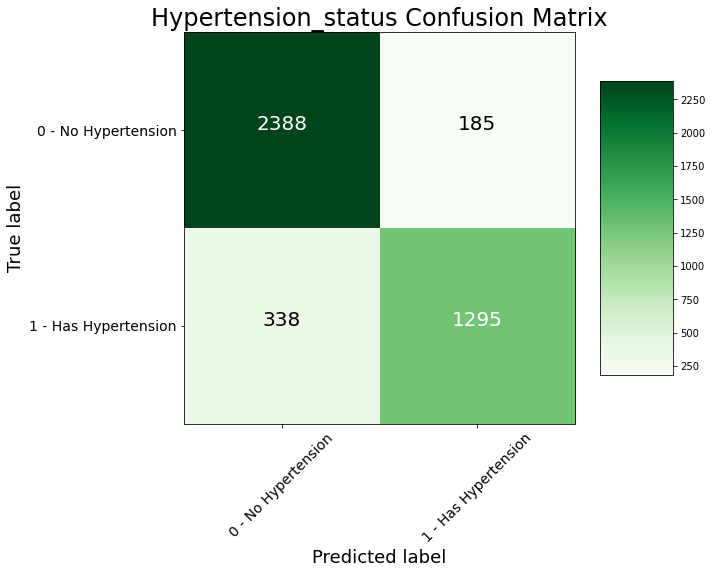

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),\
              fontsize = 20,\
              horizontalalignment="center",\
              color="white" if cm[i, j] > thresh else "black")
      plt.grid(None)
      plt.tight_layout()
      plt.ylabel('True label', size = 18)
      plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_valid, rf_predictions)
plot_confusion_matrix(cm, classes = ['0 - No Hypertension', '1 - Has Hypertension'],
                      title = 'Hypertension_status Confusion Matrix')

In [ ]:
feat_labels = X_train.columns

In [ ]:
feature_importance = []
# Print the name and gini importance of each feature
for feature in zip(feat_labels, model_rf.feature_importances_):
    feature_importance.append(feature)

In [ ]:
sorted(feature_importance, key=lambda x: x[1], reverse=True)

[('Told_High_blood_pressure_dummy_1.0', 0.13300968120740597),
 ('age', 0.10029465384827278),
 ('Hypertension_dummy_1.0', 0.055769180449673945),
 ('Waist_Circumference', 0.03219396397944291),
 ('Vigorous_recreational_activities_1_dummy_2.0', 0.02134887498174454),
 ('BMI', 0.02091016043952907),
 ('Weight(kg)', 0.01574570135764412),
 ('have_diabetes_1_dummy_2.0', 0.01329290038663001),
 ('Arm_Circumference', 0.011286041247101739),
 ('Education_dummy', 0.008216499443709922),
 ('>100_cigarettes_inlife_1_dummy', 0.006622453626279082),
 ('DR1TCAFF', 0.0063951705920755365),
 ('blood_transfusion_1_dummy_2.0', 0.005895520118491042),
 ('DR2TCAFF', 0.005817497422843443),
 ('Height(cm)', 0.005768705160985947),
 ('have_prediabetes_1_dummy_2.0', 0.005325913764600267),
 ('Marital_Status_dummy', 0.005004620789249879),
 ('DR2TMOIS', 0.004691165803195167),
 ('DR1TSUGR', 0.004473023909716141),
 ('DR2TNUMF', 0.004461076686636043),
 ('WTDRD1_y', 0.0043864582271841085),
 ('WTDRD1_x', 0.004356832509210994),
 (

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train_drop, y_train) #For sklearn no one hot encoding

#Now predict using the trained XG model. 
prediction = model.predict(X_valid_drop)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_valid, prediction))

Accuracy =  0.8340466000951022


#drop col: Told_High_blood_pressure_dummy_1.0

In [ ]:
model = LogisticRegression()
model.fit(X_train_drop, y_train)
y_pred = pd.Series(model.predict(X_valid_drop))
print("Accuracy:", metrics.accuracy_score(y_valid, y_pred))
print("Precision:", metrics.precision_score(y_valid, y_pred))
print("Recall:", metrics.recall_score(y_valid, y_pred))

Accuracy: 0.6295767950546838
Precision: 0.5461254612546126
Recall: 0.2718922229026332


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#Random Forest

In [ ]:
# Create the model with 100 trees
model_rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model_rf.fit(X_train_drop, y_train)
# Actual class predictions
rf_predictions = model_rf.predict(X_valid_drop)
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_valid, rf_predictions))

Accuracy =  0.7983832620066571


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

train_probs = model_rf.predict_proba(X_train_drop)[:,1] 
probs = model_rf.predict_proba(X_valid_drop)[:, 1]
train_predictions = model_rf.predict(X_train_drop)

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.8679451623137157


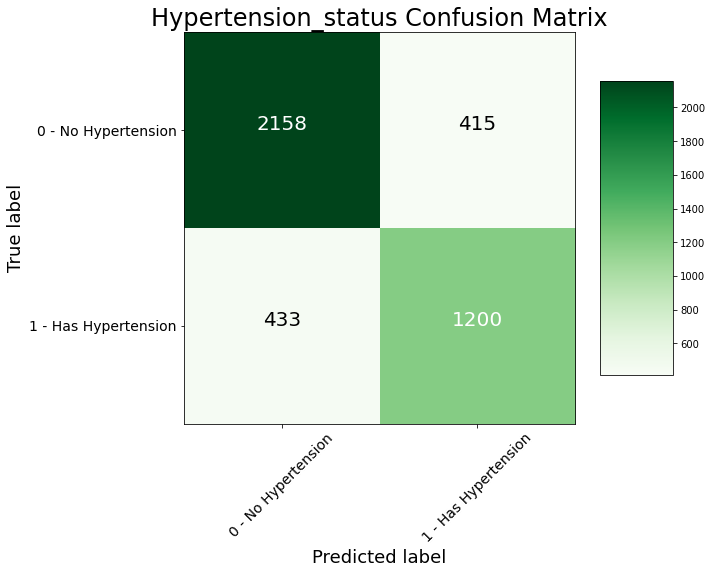

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),\
              fontsize = 20,\
              horizontalalignment="center",\
              color="white" if cm[i, j] > thresh else "black")
      plt.grid(None)
      plt.tight_layout()
      plt.ylabel('True label', size = 18)
      plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_valid, rf_predictions)
plot_confusion_matrix(cm, classes = ['0 - No Hypertension', '1 - Has Hypertension'],
                      title = 'Hypertension_status Confusion Matrix')

In [ ]:
feature_importance = []
# Print the name and gini importance of each feature
for feature in zip(feat_labels, model_rf.feature_importances_):
    feature_importance.append(feature)

In [ ]:
sorted(feature_importance, key=lambda x: x[1], reverse=True)

[('age', 0.12744661016663536),
 ('Waist_Circumference', 0.04407567619000799),
 ('BMI', 0.022584080739880906),
 ('Weight(kg)', 0.018535887065898152),
 ('have_diabetes_1_dummy_1.6', 0.017830162242057447),
 ('Vigorous_recreational_activities_1_dummy_1.6', 0.01638181058708933),
 ('Arm_Circumference', 0.013203011810775872),
 ('Education_dummy', 0.009047647536261439),
 ('DR2TCAFF', 0.008819325419009476),
 ('blood_transfusion_1_dummy_1.6', 0.008298383411044677),
 ('DR1TCAFF', 0.008141949131875402),
 ('Height(cm)', 0.007234557109408925),
 ('DR2TNUMF', 0.006714949638198808),
 ('>100_cigarettes_inlife_1_dummy', 0.006415253355582197),
 ('DR2TMOIS', 0.006046454980770468),
 ('have_prediabetes_1_dummy_1.6', 0.005532143094402697),
 ('DR1TMOIS', 0.0053764283294582375),
 ('WTDRD1_x', 0.005365909892105019),
 ('DR1TSUGR', 0.005265600561706069),
 ('WTDRD1_y', 0.005258375287304766),
 ('DR1TCARB', 0.0052535562991082715),
 ('WTDR2D_y', 0.005158455946347476),
 ('DR2TSUGR', 0.005152468235725665),
 ('WTDR2D_x',

#Decision Tree

In [ ]:
# Import DecisionTreeRegressor from sklearn.tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import sklearn.model_selection as cv
from sklearn.tree import DecisionTreeClassifier
#(x_train, x_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.20)
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=25,
                           min_samples_leaf=0.01,
                           random_state=3)

# Fit dt to the training set
dt.fit(X_train_drop, y_train)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=0.01, random_state=3)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_valid_drop)

# Compute mse_dt
mse_dt = MSE(y_valid, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
print('Score',dt.score(X_valid_drop,y_valid))

Test set RMSE of dt: 0.46
Score 0.7924393723252496


In [ ]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train_drop, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.45


In [ ]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train_drop, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_valid_drop)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_valid, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.46
